Part 2: SQL Querying

In [12]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
engine = create_engine("sqlite:///sales_dw.db", echo=False)


#1. Find the total sales for each product
qyery = """
SELECT 
    p.ProductID,
    p.ProductName,
    SUM(f.TotalSales) AS TotalSales
FROM fact_sales f
JOIN dim_product p ON f.ProductID = p.ProductID
GROUP BY p.ProductID, p.ProductName
ORDER BY TotalSales DESC;"""

result_df = pd.read_sql_query(qyery, con=engine)
display(result_df)



,ProductID,ProductName,TotalSales
0,9,Gadget I,810.0
1,8,Widget H,432.0
2,10,Gizmo J,396.0
3,5,Widget E,204.0
4,3,Widget C,136.0
5,4,Gizmo D,130.0
6,6,Gadget F,126.0
7,2,Gadget B,90.0
8,1,Widget A,65.0
9,7,Gizmo G,48.0


In [13]:
#2. List the top 5 selling categories.
qyery = """
SELECT 
    p.Category,
    SUM(f.TotalSales) AS CategorySales
FROM fact_sales f
JOIN dim_product p ON f.ProductID = p.ProductID
GROUP BY p.Category
ORDER BY CategorySales DESC
LIMIT 5;
"""

result2_df = pd.read_sql_query(qyery, con=engine)
display(result2_df)

,Category,CategorySales
0,Gadgets,1091.0
1,Widgets,772.0
2,Gizmos,574.0


In [14]:
# 3. Find the product with the highest sale (volume and value) in each category for
# the last quarter (assume the last quarter parameters).

query = """

SELECT *  FROM (
    SELECT 
        p.Category,
        p.ProductName,
        SUM(f.TotalSales) AS TotalSales,
        ROW_NUMBER() OVER (PARTITION BY p.Category ORDER BY SUM(f.TotalSales) DESC) AS rn
    FROM fact_sales f
    JOIN dim_product p ON f.ProductID = p.ProductID
    JOIN dim_date d ON f.DateID = d.DateID
    WHERE d.Year = 2023 
    AND d.Quarter = 1
    GROUP BY p.Category, p.ProductName
    ) WHERE rn = 1
"""

result5_df = pd.read_sql_query(query, con=engine)
display(result5_df)

,Category,ProductName,TotalSales,rn
0,Gadgets,Gadget I,810.0,1
1,Gizmos,Gizmo J,396.0,1
2,Widgets,Widget H,432.0,1


In [15]:
# 4. Find the total sales made by each customer and list the top 3 customers based on TotalSales.

query = """
SELECT 
    *
FROM fact_sales f
;
"""

result4_df = pd.read_sql_query(query, con=engine)
display(result4_df)

,Date,ProductID,ProductName,QuantitySold,Price,Category,CustomerID,TotalSales,DateID
0,2023-02-01,9,Gadget I,10,10.0,Gadgets,102,100.0,2023-02-01
1,2023-02-02,10,Gizmo J,3,11.0,Gizmos,103,33.0,2023-02-02
2,2023-02-03,1,Widget A,6,2.5,Gadgets,104,15.0,2023-02-03
3,2023-02-04,2,Gadget B,9,3.0,Gadgets,105,27.0,2023-02-04
4,2023-02-05,3,Widget C,8,4.0,Widgets,101,32.0,2023-02-05
5,2023-02-06,4,Gizmo D,6,5.0,Gizmos,102,30.0,2023-02-06
6,2023-02-07,5,Widget E,7,6.0,Widgets,103,42.0,2023-02-07
7,2023-02-08,6,Gadget F,5,7.0,Gadgets,104,35.0,2023-02-08
8,2023-02-09,7,Gizmo G,2,8.0,Gizmos,105,16.0,2023-02-09
9,2023-02-10,8,Widget H,11,9.0,Widgets,101,99.0,2023-02-10


In [16]:
# 4. Find the total sales made by each customer and list the top 3 customers based on TotalSales.

query = """
SELECT 
    c.CustomerID,
    c.CustomerName,
    SUM(f.TotalSales) AS TotalSales
FROM fact_sales f
JOIN dim_customer c ON f.CustomerID = c.CustomerID
GROUP BY c.CustomerID, c.CustomerName
ORDER BY TotalSales DESC
LIMIT 3;
"""

result4_df = pd.read_sql_query(query, con=engine)
display(result4_df)

,CustomerID,CustomerName,TotalSales
0,102,Jane Smith,335.0
1,101,John Doe,284.0
2,103,Michael Johnson,234.0


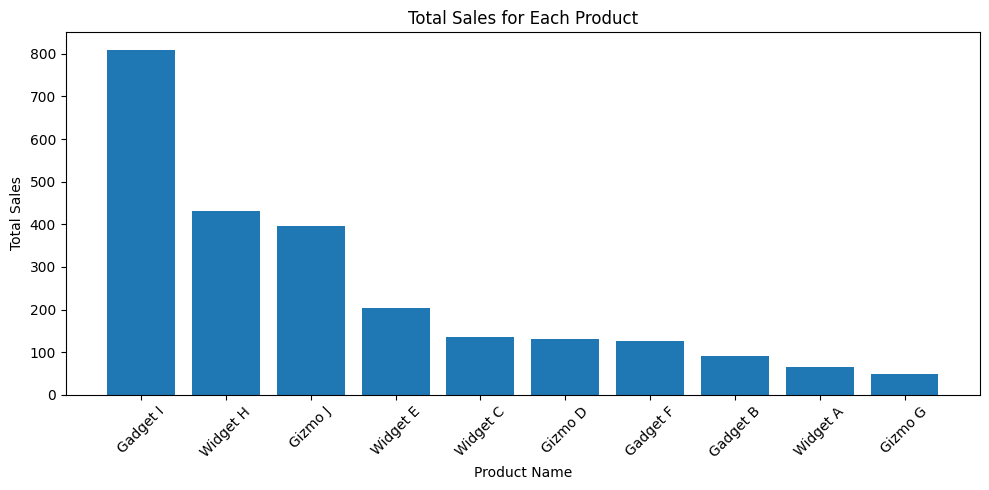

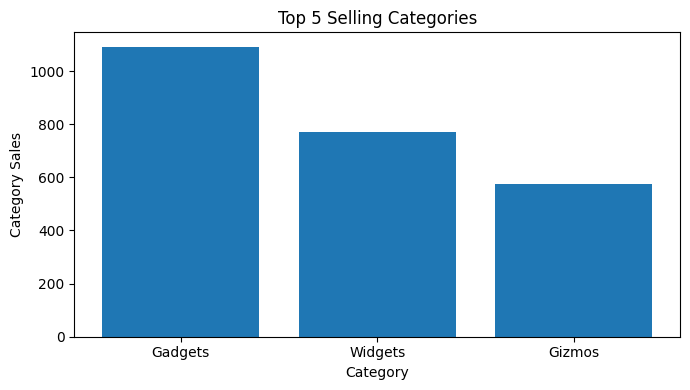

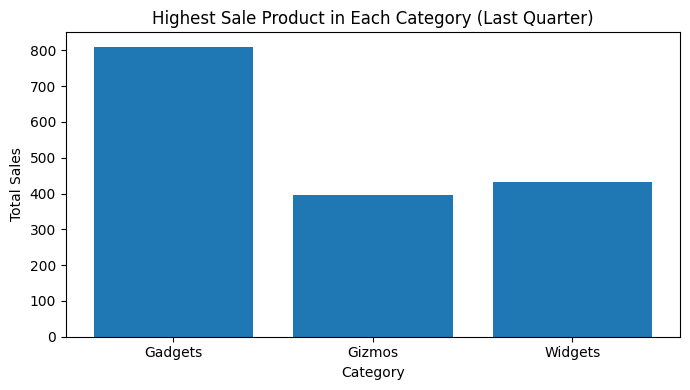

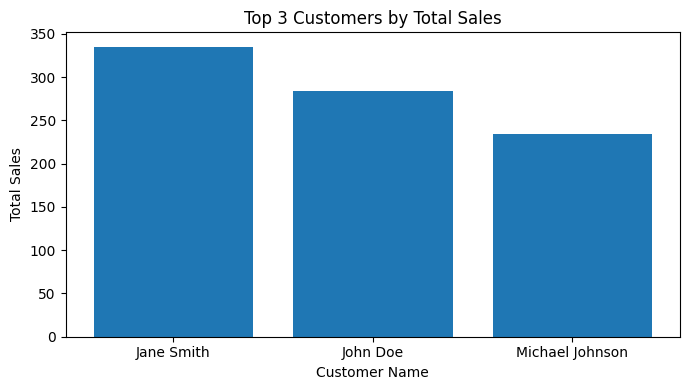

In [17]:
# 1. Total sales for each product
plt.figure(figsize=(10, 5))
plt.bar(result_df['ProductName'], result_df['TotalSales'])
plt.title('Total Sales for Each Product')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Top 5 selling categories
plt.figure(figsize=(7, 4))
plt.bar(result2_df['Category'], result2_df['CategorySales'])
plt.title('Top 5 Selling Categories')
plt.xlabel('Category')
plt.ylabel('Category Sales')
plt.tight_layout()
plt.show()

# 3. Highest sale product in each category (last quarter)
plt.figure(figsize=(7, 4))
plt.bar(result5_df['Category'], result5_df['TotalSales'])
plt.title('Highest Sale Product in Each Category (Last Quarter)')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# 4. Top 3 customers by total sales
plt.figure(figsize=(7, 4))
plt.bar(result4_df['CustomerName'], result4_df['TotalSales'])
plt.title('Top 3 Customers by Total Sales')
plt.xlabel('Customer Name')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

